In [1]:
from google.colab import auth
import pandas as pd
import os
import gdown
import numpy as np


In [2]:
print(os.getcwd())

/content


In [3]:
# auth.authenticate_user()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# import gdown

# # Define the URL of the shared folder
# shared_folder_url = 'https://drive.google.com/drive/folders/1oZPGJcazDXivUHN18EXw3ncc7erUvAgl'

# # List the files in the shared folder (use the folder ID from the URL)
# folder_id = '1oZPGJcazDXivUHN18EXw3ncc7erUvAgl'
# file_list_url = f'https://drive.google.com/drive/folders/{folder_id}'
# file_list = gdown.download(file_list_url, quiet=True)



In [43]:
file_id = '1bVXBTM47NzsnlpSqtDNhhX9tkNZx_3kG'
#file_id = '1RP_FE5fw1L8zoIHigBwN9NugRQo5IS8K'

#Define the output file name
output_file_name = 'Group8_0001.csv'
#output_file_name = 'Group8_0002.csv'

# Download the specific file using its ID
gdown.download(f'https://drive.google.com/uc?id={file_id}', output=output_file_name)

# Read the downloaded CSV file into a DataFrame using pandas
df_test = pd.read_csv(output_file_name)


# file_path = '/content/drive/MyDrive/ColabNotebooks/10_combined.csv'

# df = pd.read_csv(file_path)

# # # Save the DataFrame to a new CSV file with compression
# # df.to_csv('compressed.csv', compression='gzip', index=False)

# # Display the DataFrame
# print(df.head())




Downloading...
From: https://drive.google.com/uc?id=1bVXBTM47NzsnlpSqtDNhhX9tkNZx_3kG
To: /content/Group8_0001.csv
100%|██████████| 64.5M/64.5M [00:00<00:00, 130MB/s]


In [61]:
import pyarrow.csv as pc

table_test = pc.read_csv('/content/drive/MyDrive/ColabNotebooks/10_combined_shuffled.csv')

# Convert the pyarrow.Table to a Pandas DataFrame
df_test = table_test.to_pandas()


In [62]:
# List of minerals to keep, which basically all the minerals the model trained on

minerals_to_keep = [
    "Ilmenite", "Xenotime", "Al-Silicate", "Al-Oxide", "Fe-Sulphide",
    "Barite", "Carbonate", "Fe-sulphide_Pb", "Cassiterite", "Apatite",
    "Thorite", "Fe-Sulphide_Cu", "Columbite_Mn", "Cu-Oxide", "Celestine",
    "W-Oxide", "AlFe-Silicate", "Chromite", "Zircon", "Mn-Oxide",
    "Fe-Silicate", "Quartz", "AlK-Silicate", "AlFe-Silicate_Zn", "Zn-Oxide",
    "Rutile", "Molybdenite", "Titanite", "AlMn-Silicate", "Monazite",
    "Leucoxene", "AlCa-Silicate", "Amphibole", "Epidote",
    "Nb-bearing phase", "REE-Silicate"
]

# Filter the DataFrame to keep only rows with the specified minerals
df_test = df_test[df_test["Mineral Phase"].isin(minerals_to_keep)]

In [63]:
# 'Mineral Phase' is target column
y_test = df_test['Mineral Phase']
df_test = df_test.drop(columns=['Mineral Phase'])

# Drop the first three columns
df_test = df_test.iloc[:, 3:]

# Drop the "Sum" column by name
df_test = df_test.drop(columns=['Sum'])

X_test = df_test

print(X_test.head())

    CH_1  CH_2  CH_3  CH_4  CH_5  CH_6  CH_7  CH_8  CH_9  CH_10  ...  CH_4087  \
0      0     0     0     0     0     0     0     0     0      0  ...        0   
6      0     0     0     0     0     0     0     0     0      0  ...        0   
7      0     0     0     0     0     0     0     0     0      0  ...        0   
10     0     0     0     0     0     0     0     0     0      0  ...        0   
11     0     0     0     0     0     0     0     0     0      0  ...        0   

    CH_4088  CH_4089  CH_4090  CH_4091  CH_4092  CH_4093  CH_4094  CH_4095  \
0         0        0        0        1        0        2        0        0   
6         0        0        0        0        1        0        0        2   
7         0        0        1        1        1        0        0        1   
10        0        0        0        1        0        1        1        0   
11        0        0        0        0        1        0        1        1   

    CH_4096  
0       0.0  
6       1.0  
7 

In [64]:
y_test

print(y_test.value_counts())

Ilmenite            5808
Epidote             5193
AlFe-Silicate       4306
Amphibole           3984
AlMn-Silicate       3864
Titanite            1768
Fe-Silicate         1229
Fe-Sulphide         1079
Rutile               611
Monazite             408
AlK-Silicate         338
Quartz               182
Zircon               179
Al-Silicate          124
AlCa-Silicate         69
Xenotime              35
Zn-Oxide              33
Chromite              22
Al-Oxide              18
Cassiterite           15
Barite                15
REE-Silicate          14
Celestine             13
Mn-Oxide              12
Leucoxene             12
AlFe-Silicate_Zn      10
Apatite                6
Thorite                2
Fe-sulphide_Pb         1
Name: Mineral Phase, dtype: int64


In [ ]:
# #This step is option, I was trying to remove the excess channels as advised by the client but it doesnt make difference

# # Find the index positions of columns "CH_127" and "CH_2797" in X_test.columns
# start_col = X_test.columns.get_loc("CH_127")
# end_col = X_test.columns.get_loc("CH_2797")

# # Select only the columns within the specified range
# X_test = X_test.iloc[:, start_col:end_col+1]

# X_test

,CH_127,CH_128,CH_129,CH_130,CH_131,CH_132,CH_133,CH_134,CH_135,CH_136,...,CH_2788,CH_2789,CH_2790,CH_2791,CH_2792,CH_2793,CH_2794,CH_2795,CH_2796,CH_2797
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,1,1,...,1,0,2,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7739,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7740,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
7741,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7742,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import pyarrow.csv as pc

table = pc.read_csv('/content/drive/MyDrive/ColabNotebooks/data/concatenated_data_5000.csv')

# Convert the pyarrow.Table to a Pandas DataFrame
df = table.to_pandas()

# Now you can work with df as a Pandas DataFrame
print(df.head())  # Display the first few rows of your data


       x      y   yinv  CH_1  CH_2  CH_3  CH_4  CH_5  CH_6  CH_7  ...  \
0    400   5800  11600     0     0     0     0     0     0     0  ...   
1   9000  13200   4200     0     0     0     0     0     0     0  ...   
2  12200  12400   5000     0     0     0     0     0     0     0  ...   
3   1800  15200   2200     0     0     0     0     0     0     0  ...   
4   1400  13000   4400     0     0     0     0     0     0     0  ...   

   CH_4089  CH_4090  CH_4091  CH_4092  CH_4093  CH_4094  CH_4095  CH_4096  \
0        0        0        1      0.0      1.0      2.0      1.0      1.0   
1        0        0        0      1.0      1.0      1.0      0.0      2.0   
2        0        0        0      1.0      0.0      1.0      0.0      2.0   
3        0        0        0      0.0      1.0      1.0      0.0      2.0   
4        0        0        0      1.0      1.0      1.0      0.0      2.0   

     Sum  Mineral Phase  
0   8441       Fe-Oxide  
1  12422       Fe-Oxide  
2   9766       Fe-Ox

In [ ]:
# # Specify the path to the compressed file
# file_path = '/content/compressed.csv'

# # Get the file size in bytes
# file_size = os.path.getsize(file_path)

# # Convert bytes to megabytes (MB)
# file_size_mb = file_size / (1024 * 1024)

# print(f"File size: {file_size_mb:.2f} MB")

In [ ]:
# import gzip

# # Specify the path to the Gzip-compressed file
# file_path = '/content/compressed.csv'

# # Open the Gzip-compressed file for reading
# with gzip.open(file_path, 'rt') as gzipped_file:
#     # Read data from the compressed file and parse it into a DataFrame
#     dfc = pd.read_csv(gzipped_file)


In [5]:
# Drop the first three columns
df = df.iloc[:, 3:]

In [6]:
# Drop the "Sum" column by name
df = df.drop(columns=['Sum'])

In [7]:
print(df.head())

   CH_1  CH_2  CH_3  CH_4  CH_5  CH_6  CH_7  CH_8  CH_9  CH_10  ...  CH_4088  \
0     0     0     0     0     0     0     0     0     0      0  ...        1   
1     0     0     0     0     0     0     0     0     0      0  ...        0   
2     0     0     0     0     0     0     0     0     0      0  ...        0   
3     0     0     0     0     0     0     0     0     0      0  ...        0   
4     0     0     0     0     0     0     0     0     0      0  ...        0   

   CH_4089  CH_4090  CH_4091  CH_4092  CH_4093  CH_4094  CH_4095  CH_4096  \
0        0        0        1      0.0      1.0      2.0      1.0      1.0   
1        0        0        0      1.0      1.0      1.0      0.0      2.0   
2        0        0        0      1.0      0.0      1.0      0.0      2.0   
3        0        0        0      0.0      1.0      1.0      0.0      2.0   
4        0        0        0      1.0      1.0      1.0      0.0      2.0   

   Mineral Phase  
0       Fe-Oxide  
1       Fe-Oxide  

In [ ]:
df_backup = df

In [ ]:
#df = df_backup

In [ ]:
# #df = df_filtered

# min_sample_count = 100  # Define the minimum sample count threshold

# # Calculate the count of each label
# label_counts = df['Mineral Phase'].value_counts()

# # Identify labels that have fewer than min_sample_count samples
# rare_labels = label_counts[label_counts < min_sample_count].index.tolist()

# # Filter your DataFrame to keep only samples with labels that meet the threshold
# df_filtered = df[~df['Mineral Phase'].isin(rare_labels)]


In [ ]:
# label_counts

In [ ]:
# rare_labels

In [ ]:
# df = df_filtered

In [8]:
# 'Mineral Phase' is target column
y = df['Mineral Phase']
df = df.drop(columns=['Mineral Phase'])


In [ ]:
# # Convert all columns to numeric data type, ignoring errors for non-numeric values
# df = df.apply(pd.to_numeric, errors='coerce')

# df = df.fillna(0)

# # Calculate the summary statistics for each row
# def calculate_summary(row):
#     mean = np.mean(row)
#     std = np.std(row)
#     variance = np.var(row)  # Calculate variance instead of percentile
#     minimum = np.min(row)
#     median = np.median(row)
#     maximum = np.max(row)

#     return pd.Series([mean, std, variance, minimum, median, maximum],
#                      index=['Mean', 'Std', 'Variance', 'Min', '50%', 'Max'])

# # Apply the calculate_summary function to each row
# summary_stats = df.apply(calculate_summary, axis=1)

# # Concatenate the summary statistics DataFrame with the original DataFrame
# df_with_summary = pd.concat([df, summary_stats], axis=1)

# # Display the DataFrame with the new summary columns
# print(df_with_summary)

       CH_1  CH_2  CH_3  CH_4  CH_5  CH_6  CH_7  CH_8  CH_9  CH_10  ...  \
0         0     0     0     0     0     0     0     0     0      0  ...   
1         0     0     0     0     0     0     0     0     0      0  ...   
2         0     0     0     0     0     0     0     0     0      0  ...   
3         0     0     0     0     0     0     0     0     0      0  ...   
4         0     0     0     0     0     0     0     0     0      0  ...   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
35571     0     0     0     0     0     0     0     0     0      0  ...   
35572     0     0     0     0     0     0     0     0     0      0  ...   
35573     0     0     0     0     0     0     0     0     0      0  ...   
35574     0     0     0     0     0     0     0     0     0      0  ...   
35575     0     0     0     0     0     0     0     0     0      0  ...   

       CH_4093  CH_4094  CH_4095  CH_4096      Mean        Std    Variance  \
0          1.0      1

In [ ]:
# # keep the last 6 columns
# df_with_summary = df_with_summary.iloc[:, -6:]

# # Display the DataFrame
# print(df_with_summary)

           Mean        Std    Variance  Min  50%    Max
0      2.057861  14.161968  200.561349  0.0  0.0  270.0
1      1.193848   4.982834   24.828634  0.0  0.0   98.0
2      2.347412  19.387387  375.870760  0.0  0.0  437.0
3      2.552246  21.777309  474.251177  0.0  0.0  484.0
4      2.178711  19.367748  375.109664  0.0  0.0  446.0
...         ...        ...         ...  ...  ...    ...
35571  1.937744   8.085921   65.382111  0.0  0.0  147.0
35572  2.114746   8.360384   69.896013  0.0  0.0  155.0
35573  2.137939   8.467699   71.701920  0.0  0.0  153.0
35574  1.623047   6.737039   45.387691  0.0  0.0  113.0
35575  1.652344   6.735353   45.364975  0.0  0.0  115.0

[35576 rows x 6 columns]


In [9]:
#X = df_with_summary
X = df

In [10]:
df = []
X

,CH_1,CH_2,CH_3,CH_4,CH_5,CH_6,CH_7,CH_8,CH_9,CH_10,...,CH_4087,CH_4088,CH_4089,CH_4090,CH_4091,CH_4092,CH_4093,CH_4094,CH_4095,CH_4096
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.0,1.0,2.0,1.0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.0,1.0,1.0,0.0,2.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.0,0.0,1.0,0.0,2.0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.0,1.0,1.0,0.0,2.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.0,1.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184013,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1.0,0.0,0.0,2.0,2.0
184014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0.0,1.0,1.0,1.0,1.0
184015,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0.0,0.0,0.0,2.0,0.0
184016,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,0.0,0.0,0.0,1.0,2.0


In [11]:
y

0             Fe-Oxide
1             Fe-Oxide
2             Fe-Oxide
3             Fe-Oxide
4             Fe-Oxide
              ...     
184013    REE-Silicate
184014    REE-Silicate
184015    REE-Silicate
184016    REE-Silicate
184017    REE-Silicate
Name: Mineral Phase, Length: 184018, dtype: object

In [12]:
print(y.value_counts())

Fe-Oxide            5000
Al-Oxide            5000
AlCa-Silicate       5000
Apatite             5000
Barite              5000
Carbonate           5000
Mn-Oxide            5000
Fe-Sulphide         5000
Xenotime            5000
Background          5000
Cassiterite         5000
Fe-Sulphide_Cu      5000
Fe-sulphide_Pb      5000
Thorite             5000
W-Oxide             5000
Celestine           5000
Monazite            5000
Zircon              5000
Zn-Oxide            5000
Epidote             5000
Fe-Silicate         5000
Rutile              5000
Quartz              5000
AlK-Silicate        5000
AlFe-Silicate_Zn    5000
Columbite_Mn        5000
AlFe-Silicate       5000
Ilmenite            5000
Amphibole           5000
Titanite            5000
AlMn-Silicate       5000
Al-Silicate         5000
Chromite            5000
Leucoxene           5000
Cu-Oxide            4616
Nb-bearing phase    3735
Molybdenite         2967
REE-Silicate        2700
Name: Mineral Phase, dtype: int64


In [13]:
unique_values = np.unique(y)
unique_count = len(unique_values)

print(f"Number of unique values in 'y': {unique_count}")

Number of unique values in 'y': 38


In [14]:
num_samples_X = X.shape[0]
print("Number of samples for x:", num_samples_X)
num_samples_y = y.shape[0]
print("Number of samples for y:", num_samples_y)

Number of samples for x: 184018
Number of samples for y: 184018


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Assuming df is your DataFrame with a 'Mineral Phase' column
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)

In [15]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Sample training data
train_labels = np.unique(y)

# Create and fit a LabelEncoder on the training data
label_encoder = LabelEncoder()
label_encoder.fit(train_labels)

# Save the LabelEncoder for later use
joblib.dump(label_encoder, 'label_encoder_XGB.pkl')

# Later, when you want to transform your labels (for example, in your testing code):
# Load the LabelEncoder from the saved file
loaded_label_encoder = joblib.load('label_encoder_XGB.pkl')

# Transform your labels using the loaded LabelEncoder
y = loaded_label_encoder.transform(y)


In [16]:
y


array([18, 18, 18, ..., 30, 30, 30])

In [ ]:
all_classes = list(range(len(label_encoder.classes_)))

##XGBoost

In [17]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a StandardScaler
# scaler = StandardScaler()

# # Fit the scaler to training data and transform it
# X_train_scaled = scaler.fit_transform(X_train)
# # Use the same scaler to transform your test data
# X_test_scaled = scaler.transform(X_test)

# Create a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define hyperparameters for the XGBoost model for multi-class classification
params = {
    'objective': 'multi:softprob',  # Multi-class classification with predicted probabilities
    'num_class': 38,
    'booster': 'gbtree',
    'eval_metric': 'mlogloss',  # Logarithmic loss for multi-class classification
    'max_depth': 6,
    'learning_rate': 0.05,
    'colsample_bytree': 0.9
}

# Train the XGBoost model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred_prob = bst.predict(dtest)

# Convert predicted probabilities into class labels (use argmax)
y_pred_labels = np.argmax(y_pred_prob, axis=1)

y_pred_original = label_encoder.inverse_transform(y_pred_labels)

# Evaluate the model using classification metrics (e.g., accuracy, precision, recall, F1-score)
accuracy = accuracy_score(y_test, y_pred_labels)
report = classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_)

print(f'Accuracy: {accuracy}')
print(report)


Accuracy: 0.9313389848929464
                  precision    recall  f1-score   support

        Al-Oxide       0.93      0.96      0.94      1005
     Al-Silicate       0.94      0.96      0.95      1017
   AlCa-Silicate       0.92      0.94      0.93       992
   AlFe-Silicate       0.76      0.54      0.63       978
AlFe-Silicate_Zn       0.84      0.92      0.88      1012
    AlK-Silicate       0.93      0.96      0.95       971
   AlMn-Silicate       0.90      0.91      0.90       992
       Amphibole       0.76      0.79      0.78      1018
         Apatite       0.98      0.99      0.98      1033
      Background       0.90      0.89      0.90      1026
          Barite       0.98      0.97      0.97       986
       Carbonate       0.99      1.00      1.00       982
     Cassiterite       0.98      0.99      0.98       974
       Celestine       0.99      0.99      0.99      1059
        Chromite       0.98      0.99      0.99       988
    Columbite_Mn       0.98      0.96     

In [7]:
import xgboost as xgb
import pickle

# Save the XGBoost model to a file
model_filename = '/content/drive/MyDrive/ColabNotebooks/xgboost_model_5000.pkl'
# with open(model_filename, 'wb') as model_file:
#     pickle.dump(bst, model_file)

# Load the XGBOoost model from the file
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [65]:
unique_values_test = np.unique(y_test)
unique_count_test = len(unique_values_test)

print(f"Number of unique values in 'y_test': {unique_count_test}")

Number of unique values in 'y_test': 29


In [66]:
num_samples_X_test = X_test.shape[0]
print("Number of samples for x_test:", num_samples_X_test)
num_samples_y_test = y_test.shape[0]
print("Number of samples for y_test:", num_samples_y_test)

Number of samples for x_test: 29350
Number of samples for y_test: 29350


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Assuming df is your DataFrame with a 'Mineral Phase' column
# label_encoder = LabelEncoder()
# y_test = label_encoder.fit_transform(y_test)

In [67]:
import joblib
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the LabelEncoder from the saved file
loaded_label_encoder = joblib.load('label_encoder_XGB.pkl')

# Transform test labels using the loaded LabelEncoder
y_test_encoded = loaded_label_encoder.transform(y_test)


In [68]:
y_test_encoded

array([ 3,  6, 23, ..., 23,  3, 20])

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Create a new StandardScaler for scaling the test data
# scaler_test = StandardScaler()

# # Fit the scaler to your test data and transform it
# X_test_scaled_10 = scaler_test.fit_transform(X_test)


In [ ]:
# y_test_10 = y_test_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8346166950596252
                  precision    recall  f1-score   support

        Al-Oxide       0.21      0.83      0.33        18
     Al-Silicate       0.84      0.95      0.89       124
   AlCa-Silicate       0.14      0.99      0.24        69
   AlFe-Silicate       0.93      0.57      0.71      4306
AlFe-Silicate_Zn       0.10      1.00      0.19        10
    AlK-Silicate       0.55      0.92      0.69       338
   AlMn-Silicate       0.93      0.94      0.94      3864
       Amphibole       0.80      0.80      0.80      3984
         Apatite       0.33      0.83      0.48         6
      Background       0.00      0.00      0.00         0
          Barite       0.86      0.40      0.55        15
     Cassiterite       0.94      1.00      0.97        15
       Celestine       0.80      0.92      0.86        13
        Chromite       0.95      0.95      0.95        22
         Epidote       0.94      0.77      0.85      5193
        Fe-Oxide       0.00      0.00     

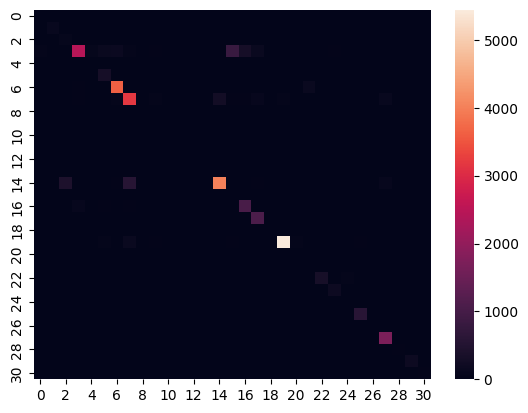

In [69]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create a DMatrix for XGBoost
dtest = xgb.DMatrix(X_test)

# Make predictions on the test set
y_pred_prob = loaded_model.predict(dtest)

# Convert predicted probabilities into class labels (use argmax)
y_pred_labels = np.argmax(y_pred_prob, axis=1)

# Convert encoded mineral labels to their original values
y_pred_original = loaded_label_encoder.inverse_transform(y_pred_labels)

# Transform test labels into integers
# y_test_encoded = loaded_label_encoder.transform(y_test)

# Evaluate the model using classification metrics (e.g., accuracy, precision, recall, F1-score)
accuracy = accuracy_score(y_test, y_pred_original)

# Generate the classification report
report = classification_report(y_test, y_pred_original)

# Generate the confusion matrix
confusion = confusion_matrix(y_test, y_pred_original)

# Plot the confusion matrix using Seaborn
sns.heatmap(confusion)

print(f'Accuracy: {accuracy}')
print(report)

In [58]:
all_classes = list(range(len(loaded_label_encoder.classes_)) )

print(all_classes)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


In [38]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create a DMatrix for XGBoost
dtest = xgb.DMatrix(X_test)

# Make predictions on the test set
y_pred_prob = loaded_model.predict(dtest)

# Convert predicted probabilities into class labels (use argmax)
y_pred_labels = np.argmax(y_pred_prob, axis=1)

y_pred_original = loaded_label_encoder.inverse_transform(y_pred_labels)

# Evaluate the model using classification metrics (e.g., accuracy, precision, recall, F1-score)
accuracy = accuracy_score(y_test_encoded, y_pred_labels)
#report = classification_report(y_test_encoded, y_pred_labels, target_names=loaded_label_encoder.classes_)

report = classification_report(y_test_encoded, y_pred_labels)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.9065606361829026
              precision    recall  f1-score   support

           3       0.92      0.38      0.54        63
           4       0.80      1.00      0.89         8
           5       0.76      1.00      0.86        28
           9       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          19       0.89      0.97      0.93       249
          23       1.00      1.00      1.00        37
          29       0.83      1.00      0.91        10
          31       1.00      1.00      1.00         1
          37       1.00      0.99      1.00       107

    accuracy                           0.91       503
   macro avg       0.72      0.73      0.71       503
weighted avg       0.92      0.91      0.89       503



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9065606361829026
                  precision    recall  f1-score   support

   AlFe-Silicate       0.92      0.38      0.54        63
AlFe-Silicate_Zn       0.80      1.00      0.89         8
    AlK-Silicate       0.76      1.00      0.86        28
      Background       0.00      0.00      0.00         0
        Fe-Oxide       0.00      0.00      0.00         0
     Fe-Silicate       0.89      0.97      0.93       249
        Ilmenite       1.00      1.00      1.00        37
          Quartz       0.83      1.00      0.91        10
          Rutile       1.00      1.00      1.00         1
        Zn-Oxide       1.00      0.99      1.00       107

        accuracy                           0.91       503
       macro avg       0.72      0.73      0.71       503
    weighted avg       0.92      0.91      0.89       503



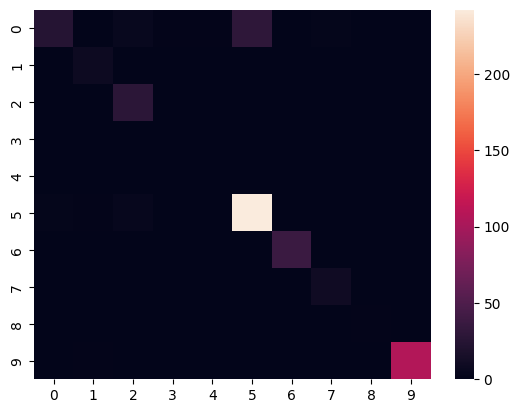

In [60]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create a DMatrix for XGBoost
dtest = xgb.DMatrix(X_test)

# Make predictions on the test set
y_pred_prob = loaded_model.predict(dtest)

# Convert predicted probabilities into class labels (use argmax)
y_pred_labels = np.argmax(y_pred_prob, axis=1)

# Convert encoded mineral labels to their original values
y_pred_original = loaded_label_encoder.inverse_transform(y_pred_labels)

# Transform test labels into integers
# y_test_encoded = loaded_label_encoder.transform(y_test)

# Evaluate the model using classification metrics (e.g., accuracy, precision, recall, F1-score)
accuracy = accuracy_score(y_test, y_pred_original)

# Generate the classification report
report = classification_report(y_test, y_pred_original)

# Generate the confusion matrix
confusion = confusion_matrix(y_test, y_pred_original)

# Plot the confusion matrix using Seaborn
sns.heatmap(confusion)

print(f'Accuracy: {accuracy}')
print(report)

## LiteGBM

In [ ]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split your training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create LightGBM datasets for training and validation
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

# Set up early stopping
early_stopping_rounds = 10  # Adjust this as needed
callbacks = [lgb.early_stopping(early_stopping_rounds)]


# Create a LightGBM dataset
#train_data = lgb.Dataset(X_train, label=y_train)


# Define hyperparameters for the LightGBM model for multi-class classification
params = {
    'objective': 'multiclass',  # Multi-class classification
    'num_class': 44,
    'boosting_type': 'gbdt',
    'metric': 'multi_logloss',  # Logarithmic loss for multi-class classification
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'verbose': 10  # Set verbose to control logging frequency
}


# Train the model
#num_round = 100
#bst = lgb.train(params, train_data, num_round)

# Train the model with early stopping and verbose evaluation every 10 rounds
num_round = 100
bst = lgb.train(
    params,
    train_data,
    num_round,
    valid_sets=[valid_data],
    callbacks=callbacks,
)


#Make predictions on the test set
y_pred = bst.predict(X_test)

# Convert predicted probabilities into class labels (use argmax)
y_pred_labels = np.argmax(y_pred, axis=1)

# Evaluate the model using classification metrics (e.g., accuracy, precision, recall, F1-score)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred_labels)
report = classification_report(y_test, y_pred_labels)

print(f'Accuracy: {accuracy}')
print(report)


In [ ]:
import lightgbm as lgb
import joblib

# Save the model to a file
model_filename = '/content/drive/MyDrive/ColabNotebooks/lightgbm_model.pkl'
#joblib.dump(bst, model_filename)

# Load the model from the file
loaded_model = joblib.load(model_filename)


In [ ]:
#Make predictions on the test set
y_pred = loaded_model.predict(X_test)

# Convert predicted probabilities into class labels (use argmax)
y_pred_labels = np.argmax(y_pred, axis=1)

# Evaluate the model using classification metrics (e.g., accuracy, precision, recall, F1-score)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred_labels)
report = classification_report(y_test, y_pred_labels)

print(f'Accuracy: {accuracy}')
print(report)


In [ ]:
data_dir = '/content/drive/My Drive/CH Counts Data'

In [ ]:
#Files to scan
train_file_numbers = range(1,8000)
train_file_names = [os.path.join(data_dir, f"Group8_{str(i).zfill(4)}.csv") for i in train_file_numbers]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import warnings
from sklearn.exceptions import UndefinedMetricWarning

import random
random.seed(42)

selected_file_names = random.sample(train_file_names, 100)


accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
count = 0

for name in selected_file_names:
    count += 1
    # Read the current CSV file
    df = pd.read_csv(name)
    df = df.fillna(0)
    df["Mineral Phase"] = df["Mineral Phase"].astype(str)
    n_col = len(df.columns)
    #df = df.drop(df.iloc[:, 2800:(n_col-2)], axis=1)
    #df = df.drop(df.iloc[:, :126], axis=1)
    #X_test = df.iloc[:,:-1]
    #y_test = df.iloc[:,-1].astype(str)
    #y_pred = random_forest.predict(X_test)

    # 'Mineral Phase' is target column
    y_test = df['Mineral Phase']
    df = df.drop(columns=['Mineral Phase'])
    # Drop the first three columns
    df = df_test.iloc[:, 3:]
    # Drop the "Sum" column by name
    df = df_test.drop(columns=['Sum'])
    X_test = df
    y_pred = loaded_model.predict(X_test)


    # Debugging: Print out the unique classes in y_test and unique_classes
    actual_unique_classes = np.unique(y_test)
    unique_classes = y_test.unique().tolist()
    report = classification_report(y_test, y_pred, zero_division = 1)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division = 1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division = 1)
    f1 = f1_score(y_test, y_pred, average='weighted',zero_division = 1)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    print(f"The classification report for {name} ({count}):\n{report}")
    avg_accuracy = sum(accuracy_list) / len(accuracy_list)
    avg_precision = sum(precision_list) / len(precision_list)
    avg_recall = sum(recall_list) / len(recall_list)
    avg_f1 = sum(f1_list) / len(f1_list)
    print(avg_accuracy,avg_precision,avg_recall,avg_f1)




In [ ]:
import matplotlib.pyplot as plt

feature_importance = bst.feature_importance()

# Get feature names (assuming they are in a list)
feature_names = X.columns.tolist()

# Create a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.title('Feature Importances')
plt.show()

In [ ]:
y = df_filtered['Mineral Phase']

## Over Sampling Using ADSYN

The ADASYN oversampling technique is a popular method for oversampling imbalanced datasets. It works by synthesizing new minority class samples by interpolating between existing minority class samples.

In [ ]:
from imblearn.over_sampling import ADASYN

# Oversample the dataset with a lower value for n_neighbors
sm = ADASYN(n_neighbors=5)  # Adjust the value as needed
X_resampled, y_resampled = sm.fit_resample(X, y)


In [ ]:
print(y_resampled.value_counts())

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame with a 'Mineral Phase' column
label_encoder = LabelEncoder()
y_resampled = label_encoder.fit_transform(y_resampled)

In [ ]:
y_resampled

## XGBoost

In [ ]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Define hyperparameters for the XGBoost model for multi-class classification
params = {
    'objective': 'multi:softprob',  # Multi-class classification with predicted probabilities
    'num_class': 18,
    'booster': 'gbtree',
    'eval_metric': 'mlogloss',  # Logarithmic loss for multi-class classification
    'max_depth': 6,
    'learning_rate': 0.05,
    'colsample_bytree': 0.9
}

# Train the XGBoost model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred_prob = bst.predict(dtest)

# Convert predicted probabilities into class labels (use argmax)
y_pred_labels = np.argmax(y_pred_prob, axis=1)

# Evaluate the model using classification metrics (e.g., accuracy, precision, recall, F1-score)
accuracy = accuracy_score(y_test, y_pred_labels)
report = classification_report(y_test, y_pred_labels)

print(f'Accuracy: {accuracy}')
print(report)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

##LiteGBM

In [ ]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Define hyperparameters for the LightGBM model for multi-class classification
params = {
    'objective': 'multiclass',  # Multi-class classification
    'num_class': 18,
    'boosting_type': 'gbdt',
    'metric': 'multi_logloss',  # Logarithmic loss for multi-class classification
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model
num_round = 100
bst = lgb.train(params, train_data, num_round)

#Make predictions on the test set
y_pred = bst.predict(X_test)

# Convert predicted probabilities into class labels (use argmax)
y_pred_labels = np.argmax(y_pred, axis=1)

# Evaluate the model using classification metrics (e.g., accuracy, precision, recall, F1-score)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred_labels)
report = classification_report(y_test, y_pred_labels)

print(f'Accuracy: {accuracy}')
print(report)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()